In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the seaborn style
sns.set()

In [3]:
data = pd.read_csv("ToyotaCorolla - MLR.csv")

In [4]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
# One-hot encode the categorical variable 'FuelType'
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

In [6]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [7]:
# Check for and handle missing values
data.isnull().sum()

Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [8]:
# Summary statistics
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   cc                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Cylinders         1436 non-null   int64
 8   Gears             1436 non-null   int64
 9   Weight            1436 non-null   int64
 10  Fuel_Type_Diesel  1436 non-null   bool 
 11  Fuel_Type_Petrol  1436 non-null   bool 
dtypes: bool(2), int64(10)
memory usage: 115.1 KB


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


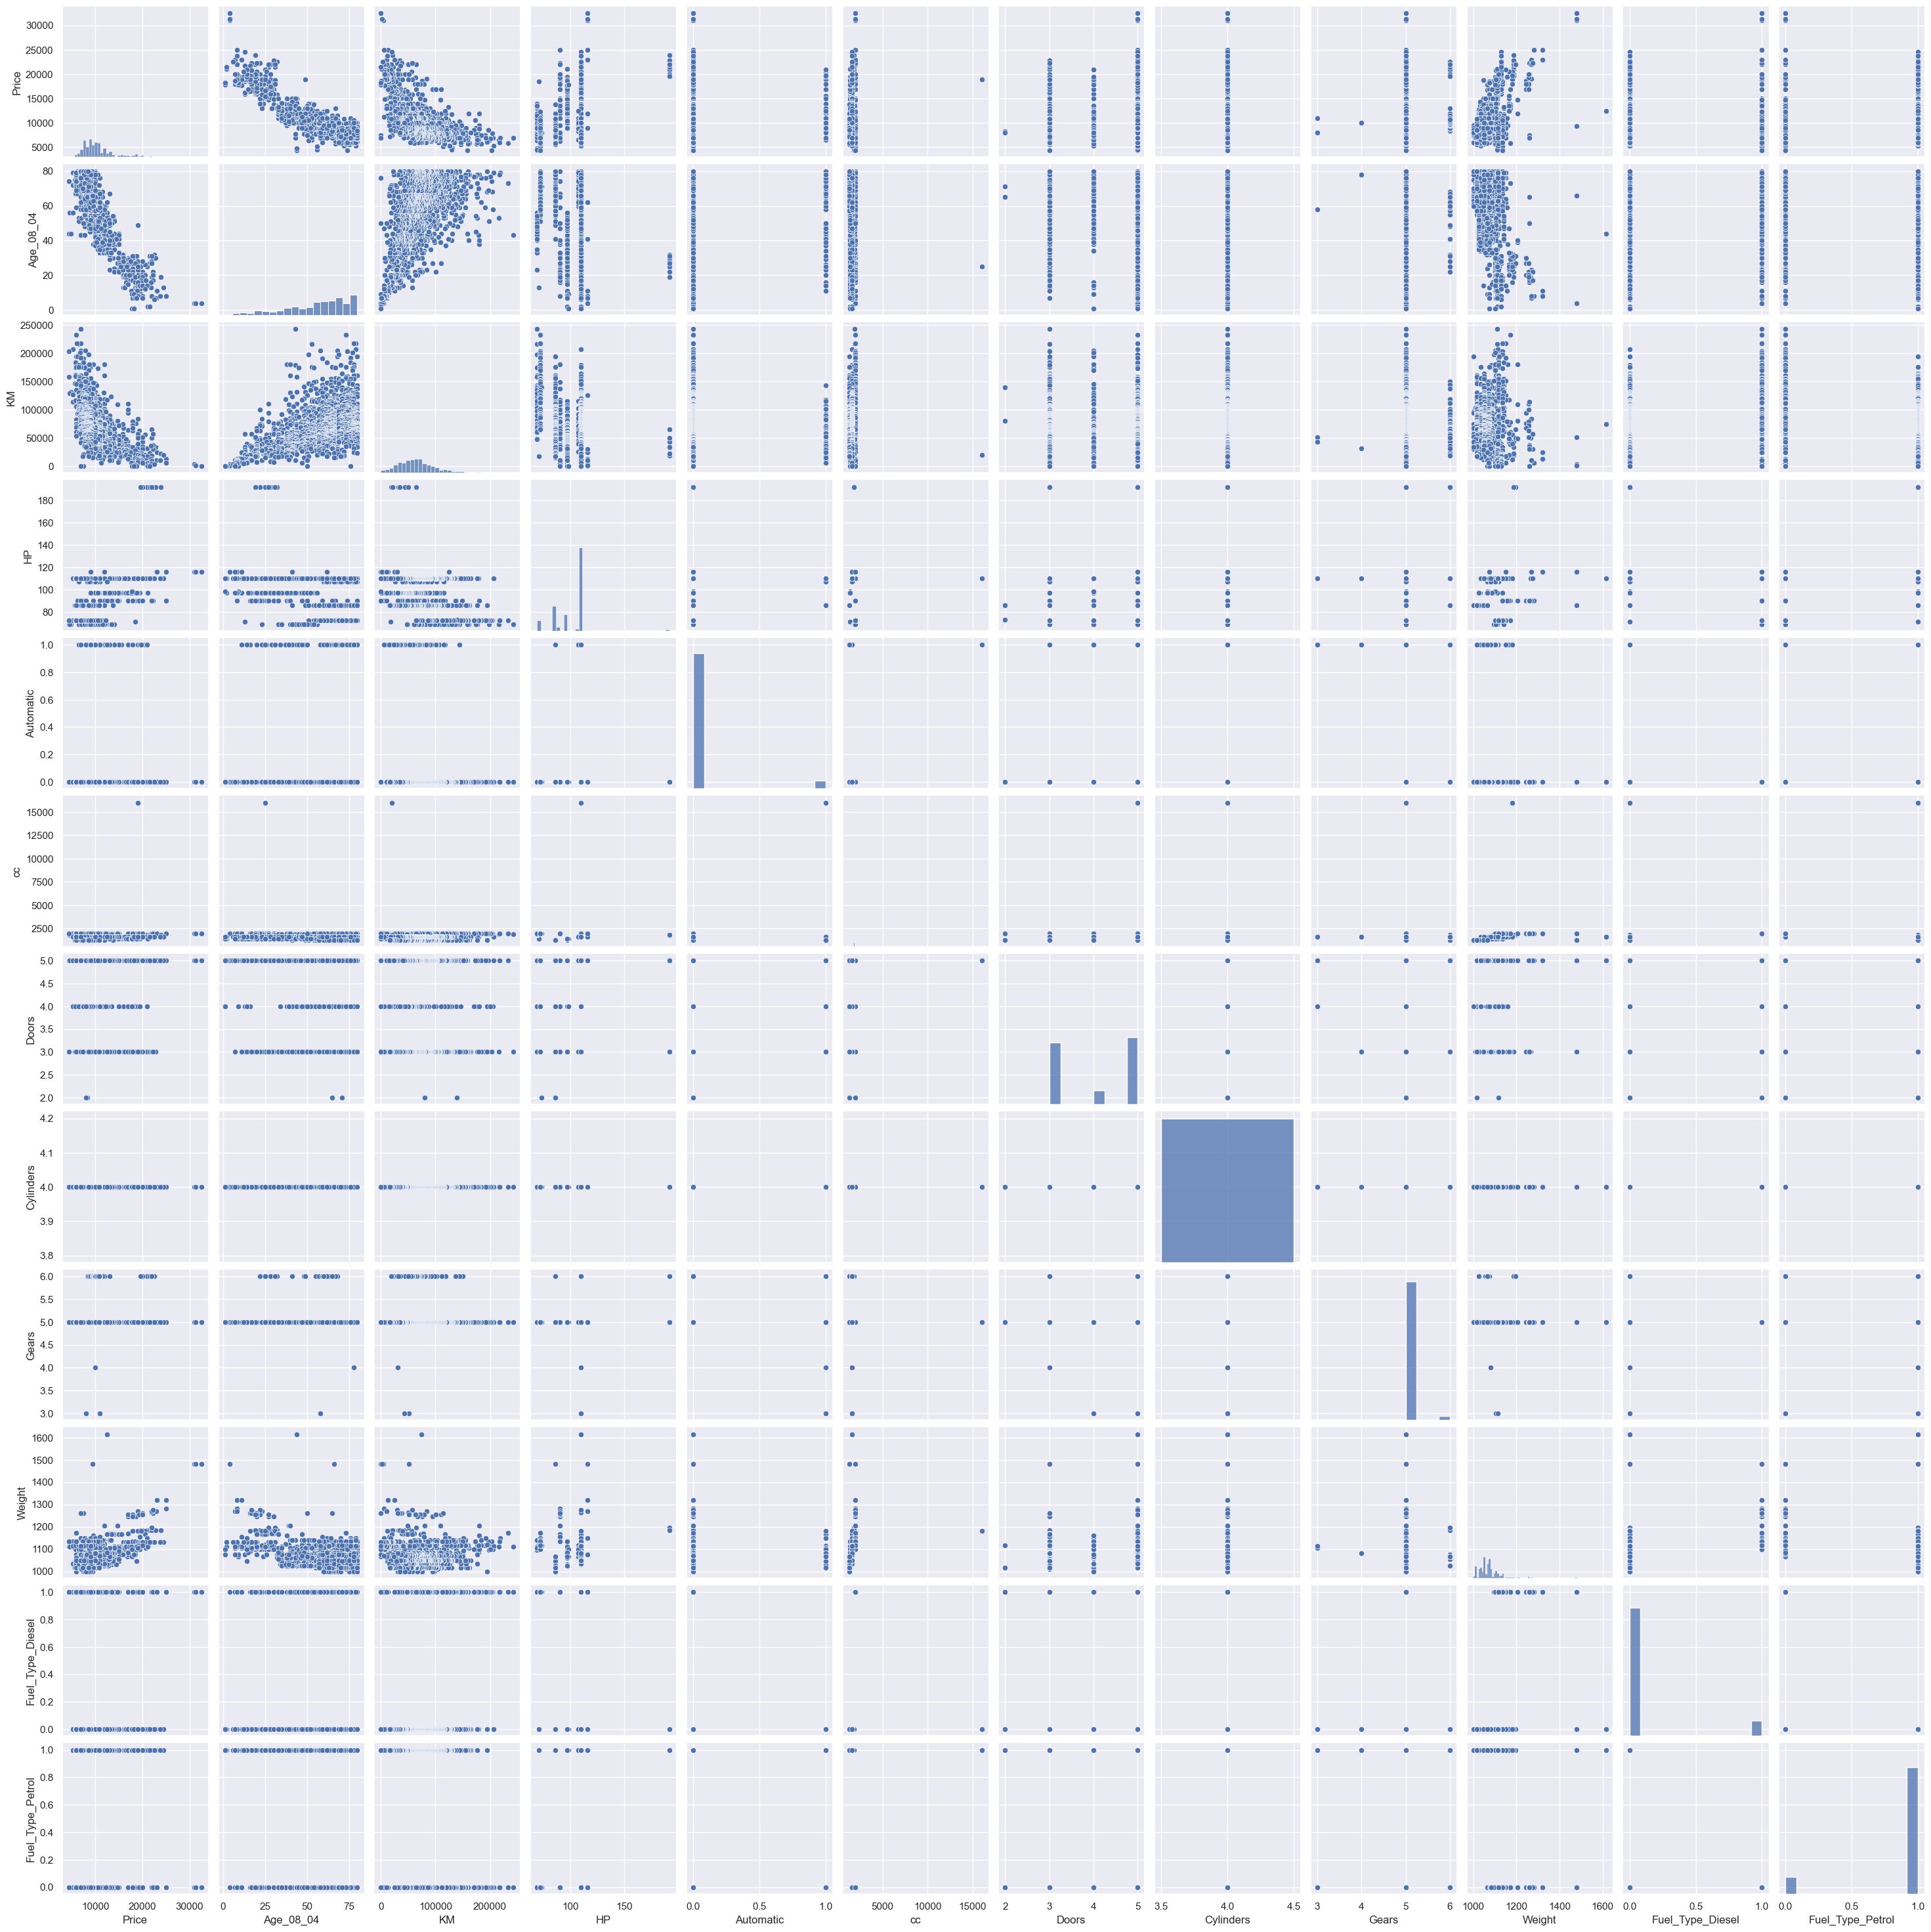

In [10]:
# Visualizations
# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

In [11]:
# Define the feature variables (X) and the target variable (y)
X = data.drop(columns=['Price'])
Y = data['Price']

In [12]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state=42)

In [13]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Model 1: Simple Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

LinearRegression()

In [16]:
# Model 2: Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [17]:
# Model 3: Ridge Regression
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [20]:
# Predict and evaluate Linear Regression
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
r2_lr = r2_score(Y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 2138350.041072185, R2: 0.8397373992708013


In [21]:
# Predict and evaluate Lasso Regression
y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
r2_lasso = r2_score(Y_test, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}')

Lasso Regression - MSE: 2138070.545772415, R2: 0.8397583465632334


In [22]:
# Predict and evaluate Ridge Regression
y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
r2_ridge = r2_score(Y_test, y_pred_ridge)

print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}')

Ridge Regression - MSE: 2138155.510632976, R2: 0.8397519787145358


In [23]:
# Coefficients for Linear Regression
print(f'Linear Regression Coefficients: {model_lr.coef_}')

# Coefficients for Lasso Regression
print(f'Lasso Regression Coefficients: {model_lasso.coef_}')

# Coefficients for Ridge Regression
print(f'Ridge Regression Coefficients: {model_ridge.coef_}')


Linear Regression Coefficients: [-2.26729478e+03 -6.11654412e+02  2.08349858e+02  3.43971298e+01
 -1.41619166e+01 -5.74678039e+01 -1.70530257e-13  1.09340417e+02
  1.31681831e+03 -2.17221726e+01  4.58047731e+02]
Lasso Regression Coefficients: [-2267.27035325  -611.71048543   208.46018035    34.33563064
   -14.04428476   -57.28823708     0.           109.26803766
  1316.40520977   -21.48431939   457.89124117]
Ridge Regression Coefficients: [-2267.06503988  -611.82579612   208.46639592    34.41377811
   -14.1474058    -57.38464168     0.           109.35062306
  1316.58315783   -21.81553958   457.6320413 ]
